#### GISC 425 T1 2020
# Lab assignment 4: Doing GIS with `geopandas`

Name: Pawaneet

In [31]:
# You need to run this cell to get things setup
%matplotlib inline

import matplotlib
import matplotlib.pyplot as pyplot

import geopandas
import geopandas as gpd
import fiona # to write file

## Grab the data
Three datasets are provided:

+ census population counts for Wellington City from the 2013 Census. These were obtained from [koordinates.com](https://koordinates.com) and from [stats.govt.nz](https://stats.govt.nz)
+ New Zealand road centrelines assembled by [LINZ](https://linz.govt.nz) and served by [koordinates.com](https://koordinates.com)
+ traffic accident data from [NZ Transport Agency](https://nzta.govt.nz/safety/safety-resources/road-safety-information-and-tools/disaggregated-crash-data/)

It is worth pointing out that I did the necessary tidying of raw datasets entirely in `geopandas` to reduce these down to the Wellington City area only, and in the case of the accidents data to focus on 2017 only!

Anyway, here they all are:

In [32]:
pop = geopandas.read_file('data/wgtn-2013-pop.geojson')
rds = geopandas.read_file('data/wgtn-roads.shp')
crashes = geopandas.read_file('data/crashes-2017.geojson')

## Take a look at the data
### First a map
Once again, a reminder of making maps in `geopandas`.

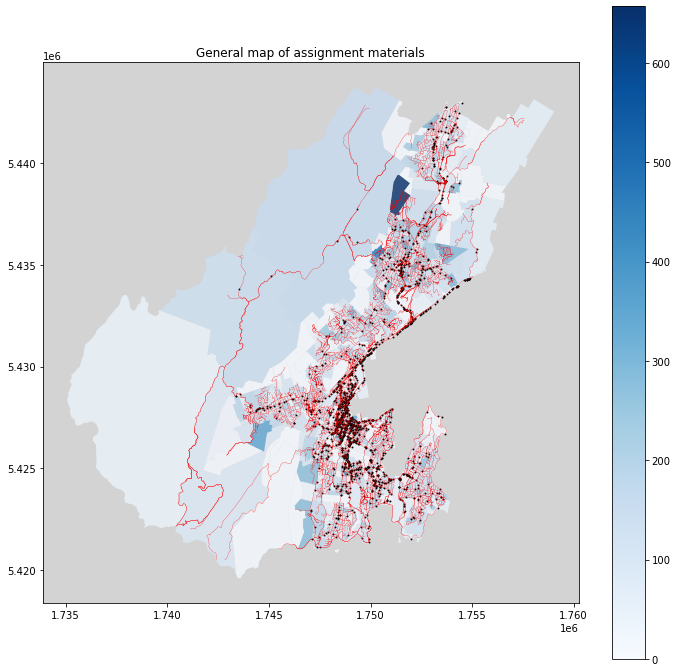

In [33]:
# Make the figure
fig = pyplot.figure(figsize=(12,12))
ax = fig.add_subplot(111)
# Set background colour to grey
ax.set_facecolor('lightgrey')
ax.set_title("General map of assignment materials")

# Plot meshblock populations
pop.plot(ax=ax, column='pop2013', cmap='Blues', alpha=0.8, legend=True)
# Add the roads
rds.plot(ax=ax, linewidth=0.25, color='r')
# Add the crashes
crashes.plot(ax=ax, color='k', markersize=.8)

# Then tables
Also important to examine the data tables, so that you know variable names and so on.

In [34]:
pop.head()

,OBJECTID,MB2013,AU2013,AU2013_NAM,pop2013,geometry
0,30221,1990400,572600,Tawa Central,57,"POLYGON ((1752715.127 5440817.178, 1752870.706..."
1,32856,2171003,576400,Newtown East,45,"POLYGON ((1749094.480 5424336.684, 1749100.024..."
2,32521,2142900,573400,Mt Victoria West,9,"POLYGON ((1749173.851 5426375.590, 1749190.606..."
3,32015,2104000,574702,Wilton,135,"POLYGON ((1747166.183 5429976.023, 1747153.031..."
4,32295,2124200,573000,Lambton,3,"POLYGON ((1748753.182 5428642.302, 1748818.498..."


In [35]:
rds.head()

,road_secti,length,geometry
0,1325758,11.687530,"LINESTRING (1748050.917 5431494.273, 1748061.3..."
1,1325784,307.427950,"LINESTRING (1751176.549 5434024.963, 1751163.4..."
2,1325809,153.915042,"LINESTRING (1753310.082 5439021.035, 1753382.5..."
3,1325810,157.631564,"LINESTRING (1753567.138 5438592.389, 1753581.1..."
4,1325811,15.048831,"LINESTRING (1753591.559 5439033.021, 1753606.4..."


In [36]:
crashes.head()

,CRASH_SEV,FATAL_COUN,SERIOUSINJ,MINORINJ_C,MULTI_VEH,AU_ID,MB_ID,CRASH_LOCN,CRASH_LO_1,geometry
0,F,1,0,0,Vehicle(s)+Pedestrian(s),572600,1990500,MAIN ROAD,ESSEX ST,POINT (1753096.000 5440813.000)
1,M,0,0,1,Single vehicle,573522,2086104,NASSAU AVENUE,JAMAICA DRIVE,POINT (1754055.000 5438847.000)
2,M,0,0,1,Vehicle(s)+Pedestrian(s),577200,2206200,COBHAM DRIVE,SHELLY BAY ROAD,POINT (1751588.000 5424742.000)
3,M,0,0,1,Single vehicle,573700,2082800,Z CARPARK,GOTHIC ST,POINT (1751402.000 5434774.000)
4,S,0,1,0,Single vehicle,573000,2126900,THE TERRACE,ALLENBY TERRACE,POINT (1748404.000 5427737.000)


## The assignment
This assignment challenges you to perform fairly simple GIS data manipulation using `geopandas`.

The output requested is **a map of traffic accidents per km of road at Census Area Unit level**.

You should submit a notebook to accomplish this task, including code comments, or markdown cells that explain the steps you are carrying out, as you go along.

In [37]:
# dissolving into the Area Unit Level via column AU2013_NAM / AU2013
dissolve_pop = pop.dissolve(by='AU2013_NAM', aggfunc='sum', as_index=False) 

dissolve_pop # out of 2057 there 88 dissolved polygons

,AU2013_NAM,geometry,OBJECTID,pop2013
0,Adelaide,"POLYGON ((1749020.670 5425217.308, 1748929.576...",553962,1017
1,Aro Street-Nairn Street,"POLYGON ((1748312.147 5426624.576, 1748304.612...",1438910,3909
2,Awarua,"POLYGON ((1748509.055 5431947.501, 1748472.503...",1244161,3153
3,Belmont,"MULTIPOLYGON (((1757824.323 5440568.897, 17579...",58761,63
4,Berhampore East,"POLYGON ((1749004.711 5424001.706, 1748994.053...",360822,1008
...,...,...,...,...
83,Wadestown,"POLYGON ((1749063.941 5430048.347, 1749056.473...",1375327,3516
84,Wellington City-Marinas,"MULTIPOLYGON (((1749687.129 5427509.394, 17496...",64916,36
85,Willis Street-Cambridge Terrace,"POLYGON ((1749181.610 5426637.766, 1749176.111...",2268035,7338
86,Wilton,"POLYGON ((1747291.287 5429342.206, 1747320.134...",672177,2058


In [38]:
# Generating crashes column CALLED "CASES" which indicates the contain amount of cases.
crashes["CASES"]=1


# Organising the columns
crashes=crashes[['AU_ID', 'CASES', 'geometry']]

crashes # Testing

,AU_ID,CASES,geometry
0,572600,1,POINT (1753096.000 5440813.000)
1,573522,1,POINT (1754055.000 5438847.000)
2,577200,1,POINT (1751588.000 5424742.000)
3,573700,1,POINT (1751402.000 5434774.000)
4,573000,1,POINT (1748404.000 5427737.000)
...,...,...,...
1687,573300,1,POINT (1748564.000 5426392.000)
1688,577000,1,POINT (1751402.000 5424463.000)
1689,577100,1,POINT (1752074.000 5422584.000)
1690,573512,1,POINT (1752333.000 5436573.000)


In [46]:
# allows each area unit level to get length data via Sjoin 
# Note: how ='right' allows us to view the AU2013_NAM interacted data  via Pop and  prevents road lines from changing. 
road_pop = geopandas.sjoin(dissolve_pop, rds, how='right', op='intersects')

road_pop # testing  

# Issues:  

# more than one polygon can be intersected by multiple lines causing the length to increase if we sum and dissolve it. 
#The dissolving process causes some line particularly beside the boundaries to interact with multiple one area unit polygon creating a raise in entire length. 
# Hence, the new length needs to be recalculate after being dissolved. 


C:\Users\User\anaconda3\envs\project\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!(epsg:2193 != PROJCS["NZGD2000_New_Zealand_Transverse_Mercator_2000",GEOGCS["NZGD2000",DATUM["New_Zealand_Geodetic_Datum_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6167"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4167"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",173],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1600000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]])
  "(%s != %s)" % (left_df.crs, right_df.crs)


,index_left,AU2013_NAM,OBJECTID,pop2013,road_secti,length,geometry
5724,0,Adelaide,553962,1017,1073789,28.648908,"LINESTRING (1748988.602 5426219.226, 1748981.4..."
5724,51,Mt Cook-Wallace Street,1464975,5106,1073789,28.648908,"LINESTRING (1748988.602 5426219.226, 1748981.4..."
187,0,Adelaide,553962,1017,1093547,76.388801,"LINESTRING (1748988.602 5426219.226, 1749046.3..."
400,0,Adelaide,553962,1017,1281947,29.870129,"LINESTRING (1749084.053 5426249.088, 1749111.3..."
396,0,Adelaide,553962,1017,1280688,31.977011,"LINESTRING (1749082.120 5426249.962, 1749111.3..."
...,...,...,...,...,...,...,...
7446,87,Woodridge,190217,1323,1275224,288.448837,"LINESTRING (1753652.132 5435515.703, 1753681.4..."
4732,87,Woodridge,190217,1323,1275018,288.225945,"LINESTRING (1753652.132 5435515.703, 1753704.7..."
2742,87,Woodridge,190217,1323,1270814,303.081963,"LINESTRING (1753652.132 5435515.703, 1753704.7..."
4276,87,Woodridge,190217,1323,1073902,109.112128,"LINESTRING (1753452.640 5435469.113, 1753474.0..."


In [47]:
# Dissolving road_pop
# Getting the sum of the road length in each Area unit level via aggfunc='sum'
dissolve_road_pop = road_pop.dissolve(by='AU2013_NAM', aggfunc='sum', as_index=False) 

# dissolve_road_pop #  Indicates 78 road length polygon via testing  
# The sum is large which means we will need to recalculate dissolve_road_pop prior to being dissolved. 

In [48]:
dissolve_road_pop

,AU2013_NAM,geometry,index_left,OBJECTID,pop2013,road_secti,length
0,Adelaide,"MULTILINESTRING ((1748988.602 5426219.226, 174...",0,38777340,71190,80660092,4654.090608
1,Aro Street-Nairn Street,"MULTILINESTRING ((1747825.957 5427366.144, 174...",164,235981240,641076,197236413,12654.389533
2,Awarua,"MULTILINESTRING ((1749475.093 5432351.818, 174...",292,181647506,460338,170114906,16278.238923
3,Berhampore East,"MULTILINESTRING ((1748658.006 5423288.416, 174...",212,19123566,53424,60631381,6135.755594
4,Berhampore West,"MULTILINESTRING ((1748774.433 5423774.199, 174...",430,62192878,222912,97048691,8381.791129
...,...,...,...,...,...,...,...
73,Vogeltown West,"MULTILINESTRING ((1748162.517 5425280.927, 174...",8118,52618599,110781,118295249,10440.225218
74,Wadestown,"MULTILINESTRING ((1748507.512 5430324.739, 174...",15770,261312130,668040,223225446,24559.995202
75,Willis Street-Cambridge Terrace,"MULTILINESTRING ((1748250.102 5426840.331, 174...",35445,945770595,3059946,491334898,27912.395953
76,Wilton,"MULTILINESTRING ((1747707.199 5430554.954, 174...",10492,82005594,251076,146664853,16254.545928


In [49]:
dissolve_road_pop["length"] = dissolve_road_pop["geometry"].length

#pop_road_dissolve # testing 

dissolve_road_pop.crs # coverting meters to km and testing crs
dissolve_road_pop["length"] = dissolve_road_pop["length"] / 1000

# pop_road_dissolve # testing 

 # Organising the columns  
dissolve_road_pop = dissolve_road_pop[['AU2013_NAM', 'length']]

dissolve_road_pop # testing 

,AU2013_NAM,length
0,Adelaide,4.630434
1,Aro Street-Nairn Street,11.645019
2,Awarua,13.665676
3,Berhampore East,5.880147
4,Berhampore West,7.657733
...,...,...
73,Vogeltown West,9.744611
74,Wadestown,22.348200
75,Willis Street-Cambridge Terrace,26.545677
76,Wilton,14.280019


In [57]:
# To get the amount of crashes cases per area unit level, I used Sjoin 

crashes_pop = geopandas.sjoin(dissolve_pop, crashes, how='inner', op='intersects') 

# It was a challenge to join feature to population data as I did not dissolve AU2013 in Pop with 1692 AU_ID attribute in crashes column due to the differentiation among the data.

# There is 1691 overall value of accidents intersecting the pop polygon out of the 1692 total accident data. 

# how='inner' allows to us to avoid one accident outside the polygon population 

dissolve_crashes_pop = crashes_pop.dissolve(by='AU2013_NAM', aggfunc='sum', as_index=False)
dissolve_crashes_pop

,AU2013_NAM,geometry,OBJECTID,pop2013,index_right,CASES
0,Adelaide,"POLYGON ((1749020.670 5425217.308, 1748929.576...",18834708,34578,28373,34
1,Aro Street-Nairn Street,"POLYGON ((1748312.147 5426624.576, 1748304.612...",37411660,101634,24470,26
2,Awarua,"POLYGON ((1748509.055 5431947.501, 1748472.503...",1244161,3153,439,1
3,Berhampore East,"POLYGON ((1749004.711 5424001.706, 1748994.053...",2525754,7056,5718,7
4,Berhampore West,"POLYGON ((1747653.801 5423700.798, 1747661.360...",11570768,41472,16198,16
...,...,...,...,...,...,...
70,Thorndon-Tinakori Road,"POLYGON ((1749345.030 5428756.321, 1749323.232...",313070562,547827,114021,133
71,Vogeltown,"POLYGON ((1748309.482 5425042.804, 1748308.923...",897072,2682,3018,3
72,Wadestown,"POLYGON ((1749063.941 5430048.347, 1749056.473...",11002616,28128,7064,8
73,Willis Street-Cambridge Terrace,"POLYGON ((1749181.610 5426637.766, 1749176.111...",471751280,1526304,193341,208


In [58]:
# To get the amount of crashes cases per area unit level, I used Sjoin 

crashes_pop = geopandas.sjoin(dissolve_pop, crashes, how='inner', op='intersects') 

# It was a challenge to join feature to population data as I did not dissolve AU2013 in Pop with 1692 AU_ID attribute in crashes column due to the differentiation among the data.

# There is 1691 overall value of accidents intersecting the pop polygon out of the 1692 total accident data. 

# how='inner' allows to us to avoid one accident outside the polygon population 

dissolve_crashes_pop = crashes_pop.dissolve(by='AU2013_NAM', aggfunc='sum', as_index=False)

# adding the amount of cases
dissolve_crashes_pop #  crashes in 75 arial units

dissolve_crashes_pop.to_file("pop_crashes_dissolve.shp") # testing 

# Organising column
dissolve_crashes_pop = dissolve_crashes_pop[['AU2013_NAM', 'CASES']]

In [53]:
dissolve_crashes_pop

,AU2013_NAM,CASES
0,Adelaide,34
1,Aro Street-Nairn Street,26
2,Awarua,1
3,Berhampore East,7
4,Berhampore West,16
...,...,...
70,Thorndon-Tinakori Road,133
71,Vogeltown,3
72,Wadestown,8
73,Willis Street-Cambridge Terrace,208


Summary: 

- pop_crashes_dissolve= crashes in per area unit level 
- pop_road_dissolve= length of road per  area unit level  

we will join both pop_road_dissolve and pop_crashes_dissolve with same  "AU2013_NAM" column attribute

In [59]:

# We will look at roads with accidents since 3 polygons roads over the accident data 
# since there is 75 accidents while 78 road polygons. 
# I may change accidents over 75 to zero. 

join_road_crashes = dissolve_crashes_pop.merge(dissolve_road_pop, how='inner', on='AU2013_NAM')

# Creating a "Km_cases" column
join_road_crashes["Km_cases"] = join_road_crashes["CASES"] / join_road_crashes["length"]

join_road_crashes # testing 


,AU2013_NAM,CASES,length,Km_cases
0,Adelaide,34,4.630434,7.342723
1,Aro Street-Nairn Street,26,11.645019,2.232714
2,Awarua,1,13.665676,0.073176
3,Berhampore East,7,5.880147,1.190446
4,Berhampore West,16,7.657733,2.089391
...,...,...,...,...
70,Thorndon-Tinakori Road,133,37.814855,3.517136
71,Vogeltown,3,5.652890,0.530702
72,Wadestown,8,22.348200,0.357971
73,Willis Street-Cambridge Terrace,208,26.545677,7.835551


Almost done! I will join this attributes to pop_disolve to have a map that covers all polygons even though they dont either accidents or roads.

I will call it "wgtn_accident_per_km" as the final version ! and join crashes_j_road to pop_dissolve by using 'AU2013_NAM'

In [61]:
traffic_accident = dissolve_pop.merge(join_road_crashes, how='left', on='AU2013_NAM')
traffic_accident

,AU2013_NAM,geometry,OBJECTID,pop2013,CASES,length,Km_cases
0,Adelaide,"POLYGON ((1749020.670 5425217.308, 1748929.576...",553962,1017,34.0,4.630434,7.342723
1,Aro Street-Nairn Street,"POLYGON ((1748312.147 5426624.576, 1748304.612...",1438910,3909,26.0,11.645019,2.232714
2,Awarua,"POLYGON ((1748509.055 5431947.501, 1748472.503...",1244161,3153,1.0,13.665676,0.073176
3,Belmont,"MULTIPOLYGON (((1757824.323 5440568.897, 17579...",58761,63,NaN,NaN,NaN
4,Berhampore East,"POLYGON ((1749004.711 5424001.706, 1748994.053...",360822,1008,7.0,5.880147,1.190446
...,...,...,...,...,...,...,...
83,Wadestown,"POLYGON ((1749063.941 5430048.347, 1749056.473...",1375327,3516,8.0,22.348200,0.357971
84,Wellington City-Marinas,"MULTIPOLYGON (((1749687.129 5427509.394, 17496...",64916,36,NaN,NaN,NaN
85,Willis Street-Cambridge Terrace,"POLYGON ((1749181.610 5426637.766, 1749176.111...",2268035,7338,208.0,26.545677,7.835551
86,Wilton,"POLYGON ((1747291.287 5429342.206, 1747320.134...",672177,2058,6.0,14.280019,0.420168


In [62]:


traffic_accident = dissolve_pop.merge(join_road_crashes, how='left', on='AU2013_NAM')
#  how = 'left' , allows us to view both non accident and accident polygons.

# Viewing appropriate columns
traffic_accident = traffic_accident[['AU2013_NAM', 'Km_cases', 'geometry']]

traffic_accident # testing

,AU2013_NAM,Km_cases,geometry
0,Adelaide,7.342723,"POLYGON ((1749020.670 5425217.308, 1748929.576..."
1,Aro Street-Nairn Street,2.232714,"POLYGON ((1748312.147 5426624.576, 1748304.612..."
2,Awarua,0.073176,"POLYGON ((1748509.055 5431947.501, 1748472.503..."
3,Belmont,NaN,"MULTIPOLYGON (((1757824.323 5440568.897, 17579..."
4,Berhampore East,1.190446,"POLYGON ((1749004.711 5424001.706, 1748994.053..."
...,...,...,...
83,Wadestown,0.357971,"POLYGON ((1749063.941 5430048.347, 1749056.473..."
84,Wellington City-Marinas,NaN,"MULTIPOLYGON (((1749687.129 5427509.394, 17496..."
85,Willis Street-Cambridge Terrace,7.835551,"POLYGON ((1749181.610 5426637.766, 1749176.111..."
86,Wilton,0.420168,"POLYGON ((1747291.287 5429342.206, 1747320.134..."


we still have some NaN values. when I joined them NaN occured because some of the polygons dont have accidents or roads. I just want to change this NaN value into 0 because they dont have accidents!. This mean they have 0 accident per whatever length of road.

In [15]:
traffic_accident["Km_cases"] = traffic_accident["Km_cases"].fillna(0)

traffic_accident # testing

,AU2013_NAM,Km_cases,geometry
0,Adelaide,7.342723,"POLYGON ((1749020.670 5425217.308, 1748929.576..."
1,Aro Street-Nairn Street,2.232714,"POLYGON ((1748312.147 5426624.576, 1748304.612..."
2,Awarua,0.073176,"POLYGON ((1748509.055 5431947.501, 1748472.503..."
3,Belmont,0.000000,"MULTIPOLYGON (((1757824.323 5440568.897, 17579..."
4,Berhampore East,1.190446,"POLYGON ((1749004.711 5424001.706, 1748994.053..."
...,...,...,...
83,Wadestown,0.357971,"POLYGON ((1749063.941 5430048.347, 1749056.473..."
84,Wellington City-Marinas,0.000000,"MULTIPOLYGON (((1749687.129 5427509.394, 17496..."
85,Willis Street-Cambridge Terrace,7.835551,"POLYGON ((1749181.610 5426637.766, 1749176.111..."
86,Wilton,0.420168,"POLYGON ((1747291.287 5429342.206, 1747320.134..."


# now let's make a map!

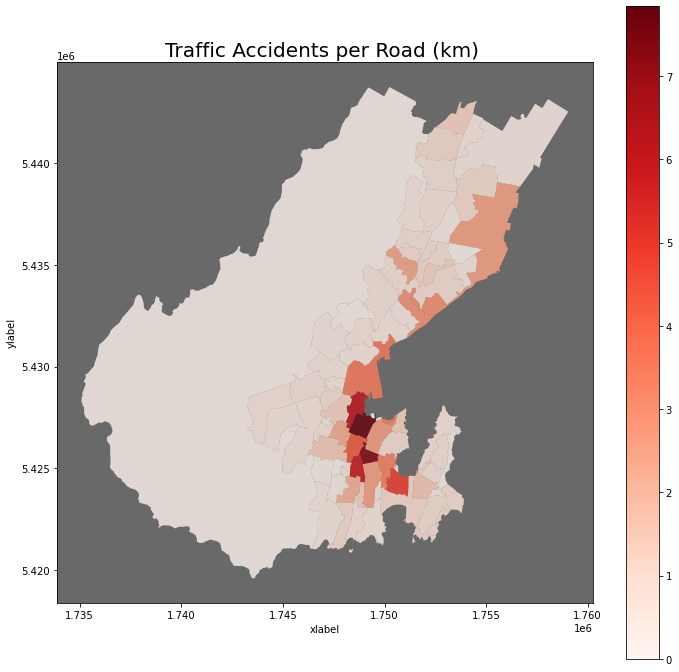

In [16]:
#  Creating a figure
fig = pyplot.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_facecolor('dimgrey') # Dimgrey background 
ax.set_title("Traffic Accidents per Road (km) ", fontsize=20, ha='center') # tile name and edits 
#ax.set_xlabel('xlabel')
#ax.set_ylabel('ylabel')

# Ploting meshblock populations
traffic_accident.plot(ax=ax, column='Km_cases', cmap='Reds', alpha=0.8, legend=True)

Thank you!